In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer


breast_cancer_ds = load_breast_cancer()

breast_cancer = pd.DataFrame(breast_cancer_ds.data, columns = breast_cancer_ds.feature_names)

breast_cancer['status'] = breast_cancer_ds.target

print(breast_cancer.head())
print(breast_cancer.shape)

print(breast_cancer["status"].value_counts())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

1 - Benign == 357
0 - Malignant == 212

In [10]:
correlations = breast_cancer.corr()
#To get the correlations of the features with the target only.

res = correlations["status"]
distribution = res.quantile([20/31])
#The top 10 correlations should be in the top 11 correlations, with the highest being 1, the target with itself.
cut_off10 = distribution[20/31]

top10_map = res[correlations["status"] >= cut_off10]

top10_cancer = breast_cancer[top10_map.keys()]
print(top10_cancer.head())
print(top10_cancer.shape)

   mean smoothness  mean symmetry  mean fractal dimension  texture error  \
0          0.11840         0.2419                 0.07871         0.9053   
1          0.08474         0.1812                 0.05667         0.7339   
2          0.10960         0.2069                 0.05999         0.7869   
3          0.14250         0.2597                 0.09744         1.1560   
4          0.10030         0.1809                 0.05883         0.7813   

   smoothness error  compactness error  concavity error  symmetry error  \
0          0.006399            0.04904          0.05373         0.03003   
1          0.005225            0.01308          0.01860         0.01389   
2          0.006150            0.04006          0.03832         0.02250   
3          0.009110            0.07458          0.05661         0.05963   
4          0.011490            0.02461          0.05688         0.01756   

   fractal dimension error  worst fractal dimension  status  
0                 0.006193    

   mean fractal dimension  texture error  smoothness error  symmetry error  \
0                 0.07871         0.9053          0.006399         0.03003   
1                 0.05667         0.7339          0.005225         0.01389   
2                 0.05999         0.7869          0.006150         0.02250   
3                 0.09744         1.1560          0.009110         0.05963   
4                 0.05883         0.7813          0.011490         0.01756   

   fractal dimension error  status  
0                 0.006193       0  
1                 0.003532       0  
2                 0.004571       0  
3                 0.009208       0  
4                 0.005115       0  
(569, 6)


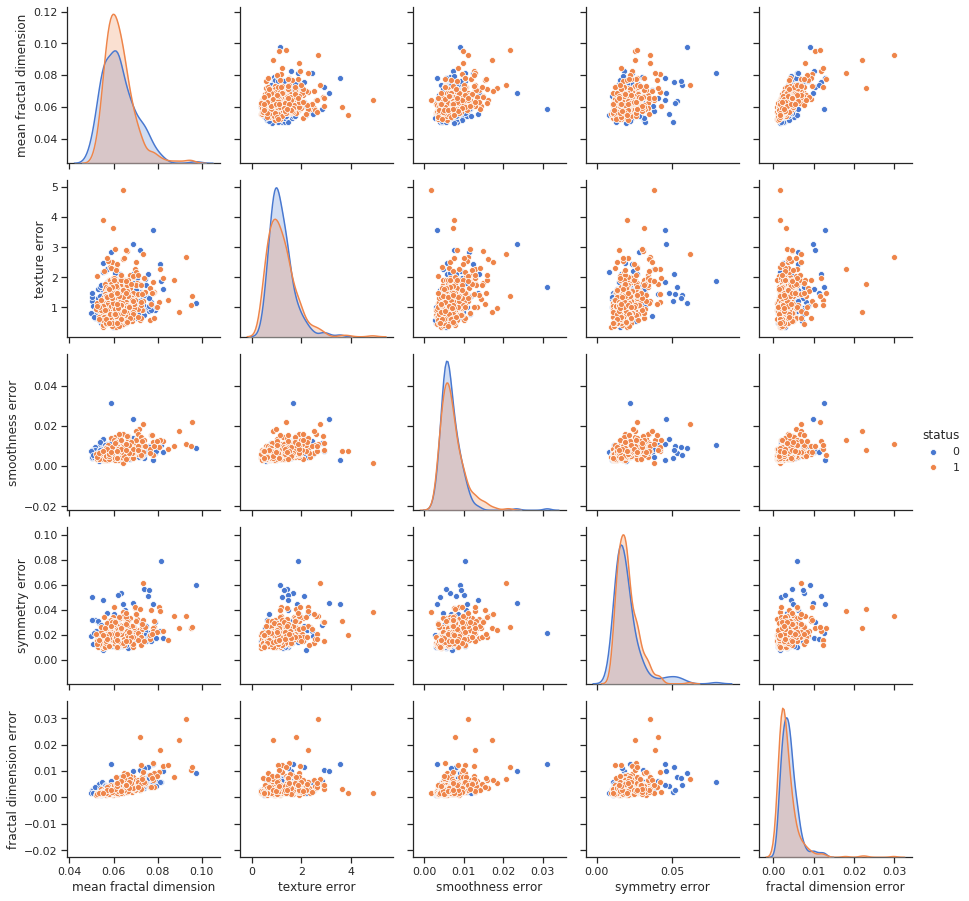

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

distribution2 = res.quantile([25/31])
cut_off5 = distribution2[25/31]

top5_map = res[correlations["status"] >= cut_off5]

top5_cancer = breast_cancer[top5_map.keys()]
print(top5_cancer.head())
print(top5_cancer.shape)

sns.set(style = "ticks", palette = "muted")
sns.pairplot(top5_cancer, hue = "status")
plt.show()

status
0 - WDBC-Malignant
1 - WDBC-Benign

In [12]:
top5_cancer_copy = top5_cancer.copy()
for col in top5_cancer_copy.columns:
    if col != "status":
        temp = top5_cancer_copy[col].mean()
        temp2 = top5_cancer_copy[col].values
        mask = (temp2 < temp) 
        temp2[mask] = "NaN"
        temp2 = pd.Series(temp2)
        top5_cancer_copy.loc[ : , col] = temp2

print(top5_cancer_copy.head())

   mean fractal dimension  texture error  smoothness error  symmetry error  \
0                 0.07871            NaN               NaN         0.03003   
1                     NaN            NaN               NaN             NaN   
2                     NaN            NaN               NaN         0.02250   
3                 0.09744            NaN           0.00911         0.05963   
4                     NaN            NaN           0.01149             NaN   

   fractal dimension error  status  
0                 0.006193       0  
1                      NaN       0  
2                 0.004571       0  
3                 0.009208       0  
4                 0.005115       0  
